In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df = df.drop(['Name','Ticket','Fare','Cabin','Age'],axis =1)

In [6]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,3,male,1,0,S
1,2,1,1,female,1,0,C
2,3,1,3,female,0,0,S
3,4,1,1,female,1,0,S
4,5,0,3,male,0,0,S
...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,S
887,888,1,1,female,0,0,S
888,889,0,3,female,1,2,S
889,890,1,1,male,0,0,C


In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [10]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,3,0,1,0,S
1,2,1,1,1,1,0,C
2,3,1,3,1,0,0,S
3,4,1,1,1,1,0,S
4,5,0,3,0,0,0,S
...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,S
887,888,1,1,1,0,0,S
888,889,0,3,1,1,2,S
889,890,1,1,0,0,0,C


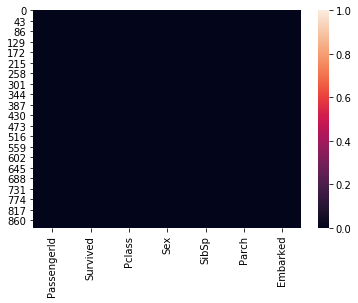

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [13]:
df['Embarked'].replace(np.NaN,df['Embarked'].mean,inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [17]:
df = df.drop(['Embarked'],axis =1)

In [18]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,0,1,0
1,2,1,1,1,1,0
2,3,1,3,1,0,0
3,4,1,1,1,1,0
4,5,0,3,0,0,0
...,...,...,...,...,...,...
886,887,0,2,0,0,0
887,888,1,1,1,0,0
888,889,0,3,1,1,2
889,890,1,1,0,0,0


In [27]:
df = df[['PassengerId','Sex','SibSp','Parch','Pclass','Survived']]

In [28]:
df

,PassengerId,Sex,SibSp,Parch,Pclass,Survived
0,1,0,1,0,3,0
1,2,1,1,0,1,1
2,3,1,0,0,3,1
3,4,1,1,0,1,1
4,5,0,0,0,3,0
...,...,...,...,...,...,...
886,887,0,0,0,2,0
887,888,1,0,0,1,1
888,889,1,1,2,3,0
889,890,0,0,0,1,1


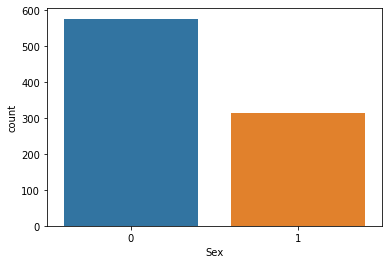

In [19]:
sns.countplot(x='Sex',data=df)

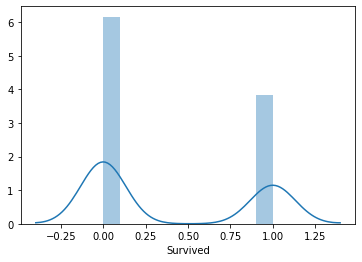

In [20]:
sns.distplot(df['Survived'],bins=10)

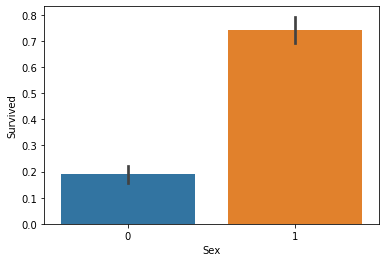

In [21]:
sns.barplot(x='Sex',y='Survived',data=df)

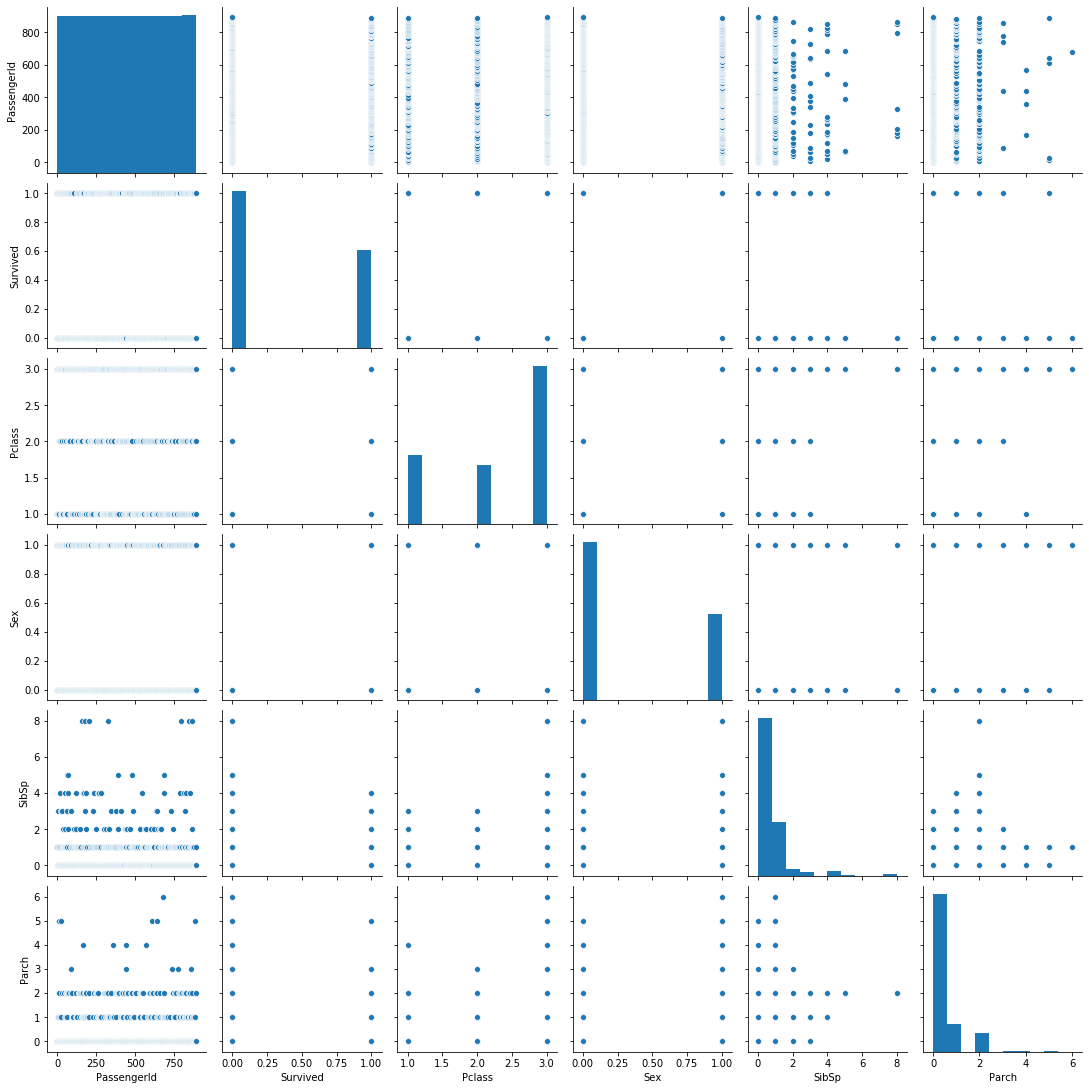

In [22]:
sns.pairplot(df)

In [41]:
x = df.iloc[:,0:5]   
y = df.iloc[:,5].values.reshape(-1,1) 

In [42]:
x.shape

(891, 5)

In [43]:
y.shape

(891, 1)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
lg=LogisticRegression()

In [47]:
lg.fit(x_train,y_train)

C:\Users\YaTiKa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred=lg.predict(x_test)
print(pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [49]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.7877094972067039


In [50]:
print(confusion_matrix(y_test,pred))

[[90 15]
 [23 51]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [52]:
from sklearn.externals import joblib
joblib.dump(lg,'titanic.pkl')

C:\Users\YaTiKa\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['titanic.pkl']